# Eddy-driven overturning streamfunction

This notebook is converted from plt_eulerian_eddy.py, which tries to calculate and visualize streamfunction of eddy-driven overturning.

## Last updated 9 October 2017.

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

 v45 - wdx1: output017 (y50)  wdx2: output024 (y65) wdx3: output031 (y80)
 
 v57 - wdx1: output013 (y50)  wdx2: output020 (y65) wdx3: output027 (y80) 
 
 v59 - wdx1: output013 (y50)  wdx2: output020 (y65) wdx3: output027 (y80) 

In [2]:
# wind, coriolis parameter
forc = nc.Dataset('/short/v45/lxy581/mom6/input/so_mom6_v39/forcing.nc','r')
cori = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v45/output000/ocean_geometry.nc','r')
data  = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v45/output031/prog.nc','r')
coord = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v45/output031/Vertical_coordinate.nc','r')

In [3]:
xh = data.variables['xh'][:]
yh = data.variables['yh'][:]   
zl = data.variables['zl'][:]
t  = data.variables['Time'][:]

In [4]:
nx = np.size(xh)
ny = np.size(yh)
nz = np.size(zl)
nt = np.size(t)

In [5]:
# horizontal resolution in km
dx = 10.
# zonal distance of the domain in m (4000km)
X = 4.0e+6

In [6]:
# layer thicknesses in m
ds = coord.variables['ds'][:]
# create a numpy array repetitive of ds
ds2 = np.full((nz,ny),np.nan)
for j in xrange(0,ny):
    ds2[:,j]=ds[:]

dx2 = np.full((nz,ny),dx)

##Residual overturning - vhmc (MOC_vh_z.ipynb)

In [7]:
vh = np.zeros((1,nz,ny))
vht= np.full((1,nz,ny),np.nan)

for k in xrange(0,nt):
    v  = data.variables['v'][k,:,:,:]   # 3D zonal velocity
    v  = v.filled(np.nan)
    vz = np.nansum(v,axis=2)            # zonal-sum velocity vz(z,y)
    mt = vz*ds2*dx2/1.e+3               # meridional transport vh(z,y) in Sv

    vht[0,:,:] = mt
    vh = np.append(vh,vht,0)

vh = vh[1:,:,:]
vhm = np.nanmean(vh,axis=0)
vhmc = vhm[::-1,...].cumsum(axis=0)[::-1,...] # cumulative integral from the bottom

/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:514: FutureWarning: In Numpy 1.9 the sum along empty slices will be zero.
  FutureWarning)
/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:607: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [8]:
# to confirm - reference density
rho_0 = 1010.3

In [9]:
taux = forc.variables['taux'][:,:]
f = cori.variables['f'][:,:]

## Wind-driven overturning - vh_m

In [10]:
# Eulerian streamfunction
vh_m = np.full((nz,ny),np.nan)

for j in xrange(0,ny):
    vh_m[:,j] = -taux[j,0]/rho_0/f[j,0]*X/1.e+6

## Eddy-driven overturning - vh_e

In [11]:
vh_e = vhmc - vh_m

In [12]:
%matplotlib inline

(array([   0, 1000, 2000, 3000, 4000]), <a list of 5 Text yticklabel objects>)

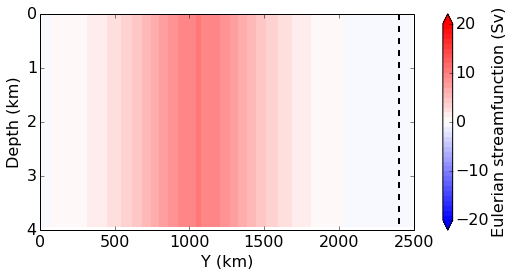

In [18]:
plt.figure(1,figsize=(8,5))

#vh_level = np.arange(-12,12 + 1.0,1.0)
#vh_ticks = np.arange(-12,12 + 6.0,6.0)
vh_level = np.arange(-20,20 + 1.0,1.0)
vh_ticks = np.arange(-20,20 + 10.0,10.0)

pcf = plt.contourf(yh,zl,vh_m,cmap=plt.cm.bwr,levels=vh_level,extend='both')
plt.plot([1150,1150],[0,4000],linewidth=2.0,linestyle='--',color='k')
cb = plt.colorbar(pcf,ticks=vh_ticks)
plt.gca().invert_yaxis()
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_yticks(np.arange(0,4000 + 1000,1000))
plt.gca().set_yticklabels(['0','1','2','3','4'])
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.set_label('Eulerian streamfunction (Sv)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Depth (km)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.savefig('/short/v45/lxy581/mom6/diag/Eulerian_wdx3.png',dpi=600)

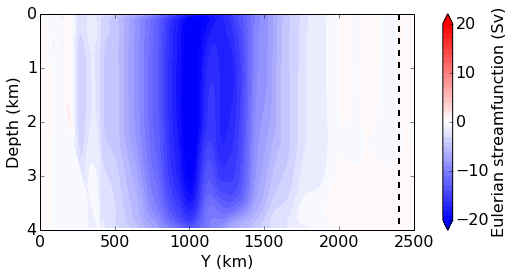

In [19]:
plt.figure(2,figsize=(8,5))

vh_level = np.arange(-20,20 + 1.0,1.0)
vh_ticks = np.arange(-20,20 + 10.0,10.0)

pcf = plt.contourf(yh,zl,vh_e,cmap=plt.cm.bwr,levels=vh_level,extend='both')
plt.plot([1150,1150],[0,4000],linewidth=2.0,linestyle='--',color='k')
cb = plt.colorbar(pcf,ticks=vh_ticks)
plt.gca().invert_yaxis()
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_yticks(np.arange(0,4000 + 1000,1000))
plt.gca().set_yticklabels(['0','1','2','3','4'])
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.set_label('Eulerian streamfunction (Sv)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Depth (km)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.savefig('/short/v45/lxy581/mom6/diag/v45_eddy_y80_wdx3.png',dpi=600)

plt.show()